# Exercicios de fixação

## Primeiros códigos para extração de dados.
Iniciando o curso de introdução ao Data Science do @meigarom.lopes, "Python do 0 ao DS", na comunidade DS.

Estarei apresentando aqui os conceitos de extração, tratamento, manipulação e análise de dados, que estarei aprendendo ao longo do curso. E conforme eu esteja adquirindo conhecimento, irei começar a trazer analises de cases reais.

Começando demonstrando a minha resolução dos exercicios práticos da aula 03 do curso. Exercicio encontrado no Kaggle (https://www.kaggle.com/datasets/harlfoxem/housesalesprediction), que é uma base de dados, referente a casas que estão à venda em Seatle, nos Estados Unidos. E sobre esse case, iremos responder algumas perguntas de negócios. (OBS: Alguns exercicios vão conter linhas com '#' pois foram testes feitos em outra biblioteca de criação de gráficos e dashboards. :) )

# Inicio

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt 
from IPython.core.display import HTML

In [17]:
def jupyter_settings():
    %matplotlib inline
    plt.style.use( 'bmh' )
    plt.rcParams[ 'figure.figsize'] = [26, 14]
    plt.rcParams[ 'font.size' ] = 24
    display( HTML( '<style>.container { width: 100% !important; } </style>' ) )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
jupyter_settings()

In [18]:
data = pd.read_csv('D:\\repositorio\\datasets\\kc_house_data.csv')

## 7.1 Crie uma nova coluna chamado: "dormitory_type"
        - Se o valor da coluna 'bedrooms' for igual a 1 -> 'studio'
        - Se o valor da coluna 'bedrooms' for igual a 2 -> 'apartament'
        - Se o valor da coluna 'bedrooms' for maior que 2 -> 'house' 

In [19]:
data['dormitory_type'] = data['bedrooms'].apply(lambda x: 'studio' if x == 1 else
                                                          'apartament' if x == 2  else
                                                          'house' if x > 2
                                                          else 'room')

In [20]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dormitory_type
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,house
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,house
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,apartament
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,house
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,house


## 7.2 Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

In [21]:
# Objetivo = Grafico da soma de preços pelo número de quarto
# Eixo X: Número de quartos
# Eixo Y: Preço
# Grafico: BARRAS

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

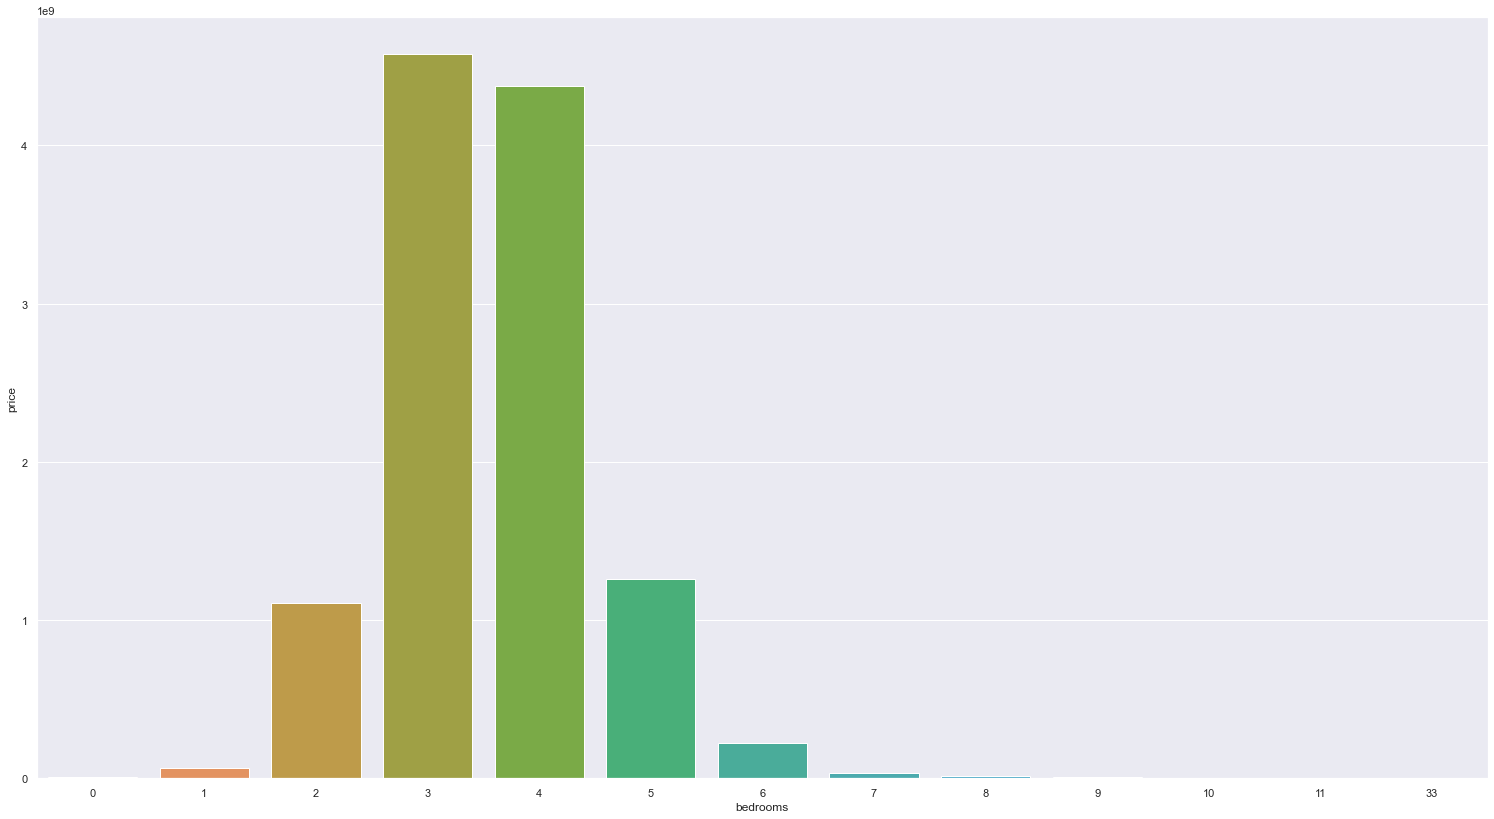

In [22]:
df= data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
sns.barplot(x='bedrooms',y='price',data=df)
#plt.bar(df['bedrooms'],df['price']);

## 7.3 Faça um gráfico de linhas que represente a média dos preços pelo ano de construção dos imóveis. 

<AxesSubplot:xlabel='yr_built', ylabel='price'>

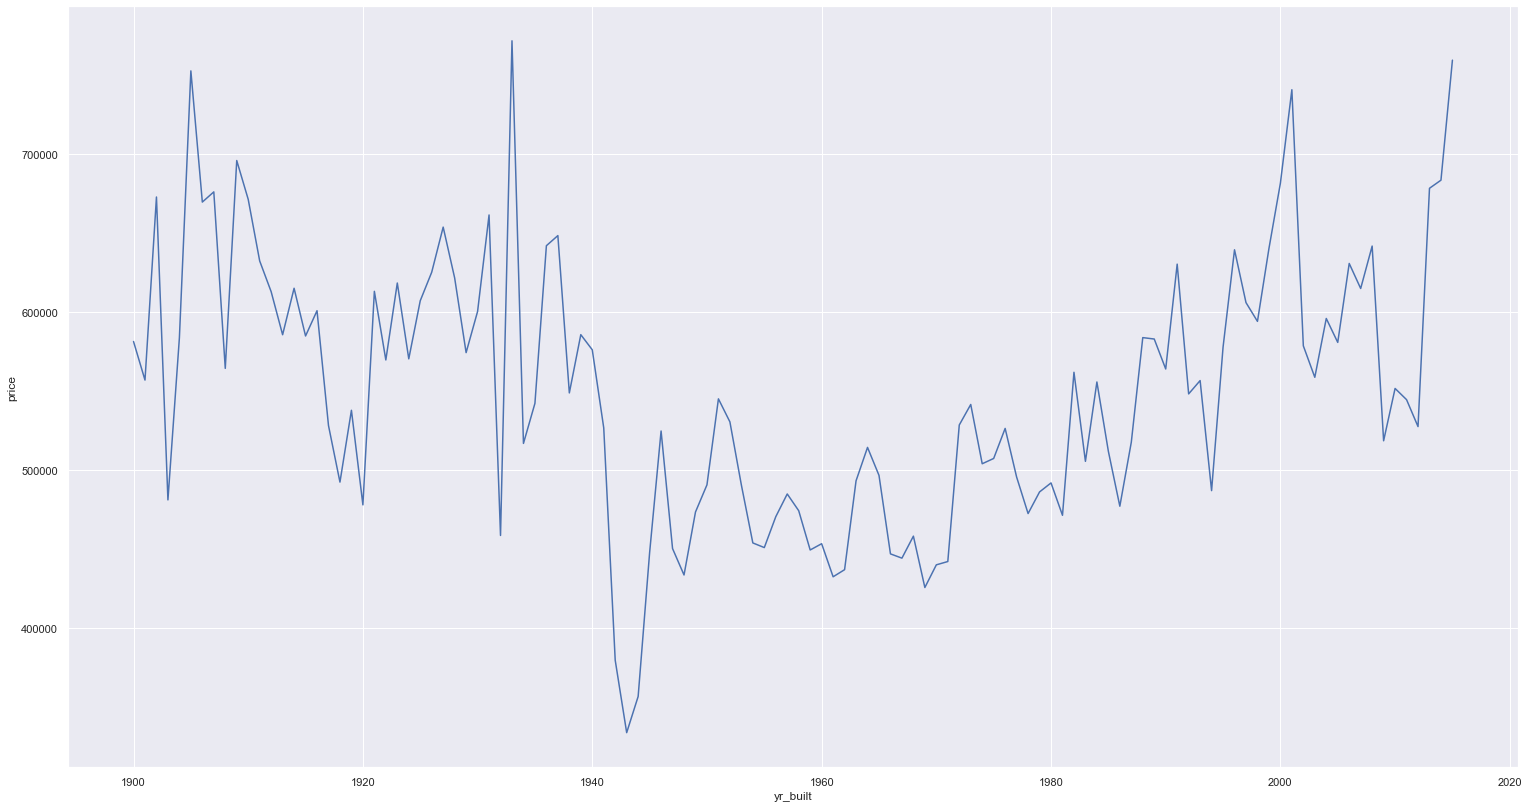

In [23]:
# Objetivo: Grafico que mostre a média dos preço por ano de construção
# Eixo X: Ano de construção.
# Eixo Y: Preço
# Grafico: Linhas

price_built = data[['price','yr_built']].groupby('yr_built').mean().reset_index() 
sns.lineplot(x='yr_built',y='price',data=price_built)
#plt.plot(price_built['yr_built'],price_built['price'])

## 7.4 Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormotórios.

<AxesSubplot:xlabel='dormitory_type', ylabel='price'>

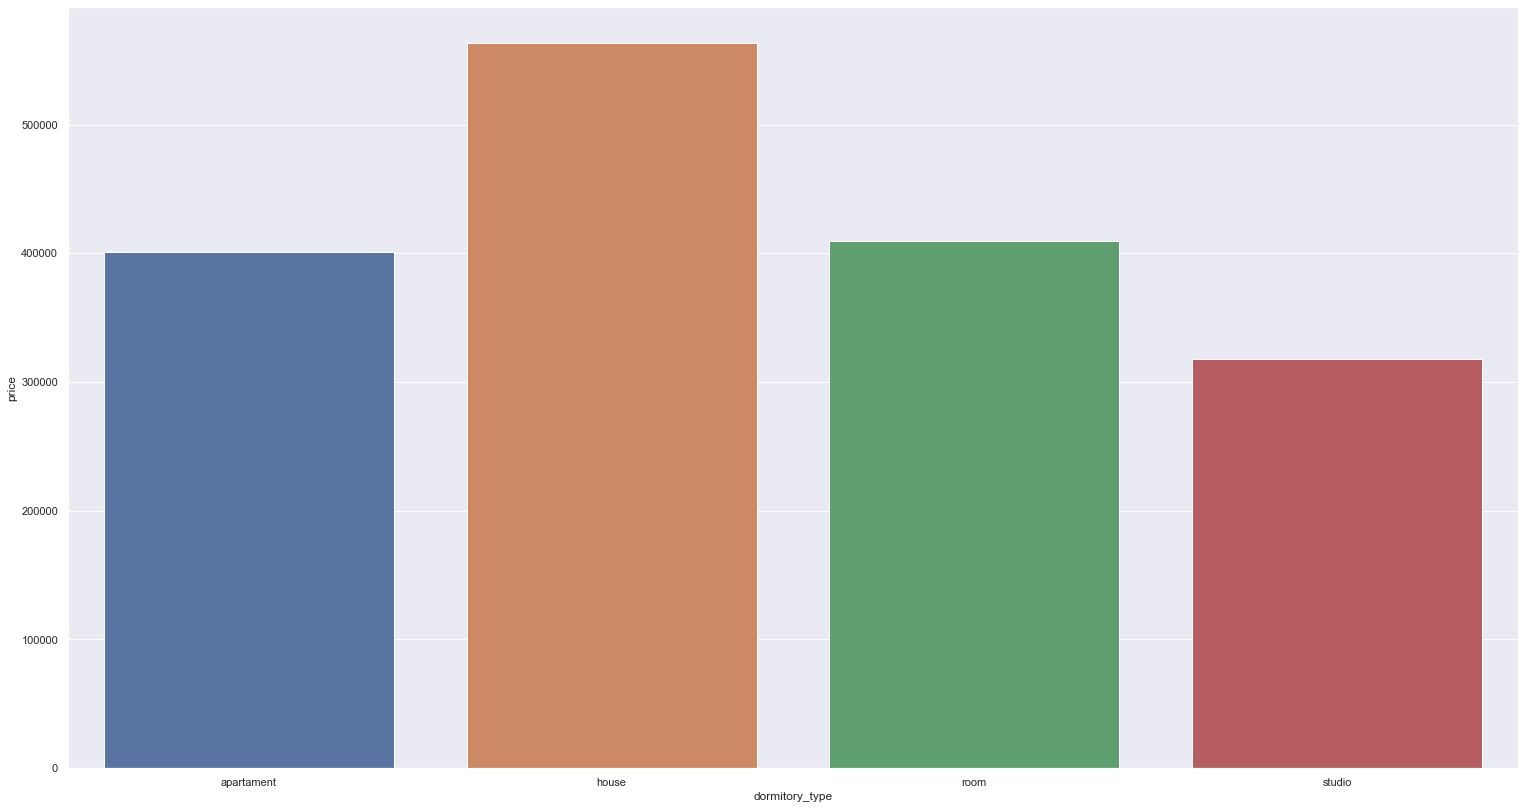

In [24]:
#Objetivo: Grafico que mostre a média dos preço por dormitório;
# Eixo X: Dormitórios
# Eixo Y: Preço
# Grafico: Barras

price_dorm = data[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
sns.barplot(x='dormitory_type',y='price',data=price_dorm)
#plt.bar(price_dorm['dormitory_type'],price_dorm['price'])

##  7.5 Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.

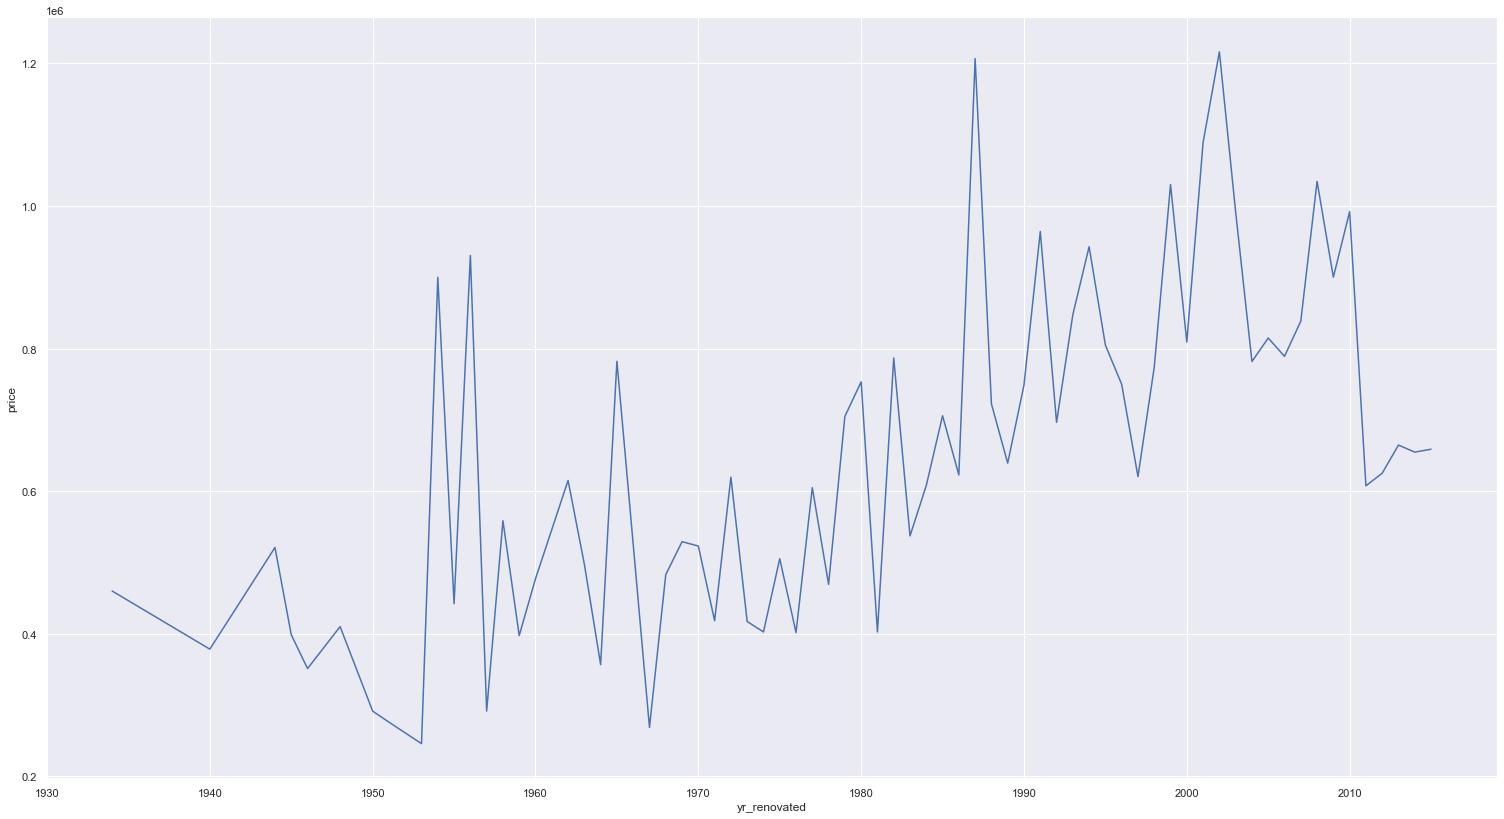

In [25]:
#Objetivo: Grafico de evolução do preço media por ano de reforma, a partide 1930
#Eixo X: Ano reforma
#Eixo Y: Preço
#Grafico: Linhas

price_renovated = data.loc[data['yr_renovated'] >= 1930, ['price','yr_renovated']].groupby('yr_renovated').mean().reset_index()
sns.lineplot(x='yr_renovated',y='price',data=price_renovated);

## 7.6 Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis. 

In [26]:
# Objetivo: Montar uma tabela que mostre a média de preço, condidionada ao ano de construção e ao tipo de dormitório.

df = data[['price','yr_built','dormitory_type']].groupby('dormitory_type').mean().reset_index()

df.head()

,dormitory_type,price,yr_built
0,apartament,401372.681884,1955.413043
1,house,563092.211899,1973.607317
2,room,409503.846154,1983.846154
3,studio,317642.884422,1942.663317


## 7.7 Crie um Dashboard com os gráficos das questões 02,03, 04 (Dashboard: 2 linha e 2 colunas) 

<BarContainer object of 4 artists>

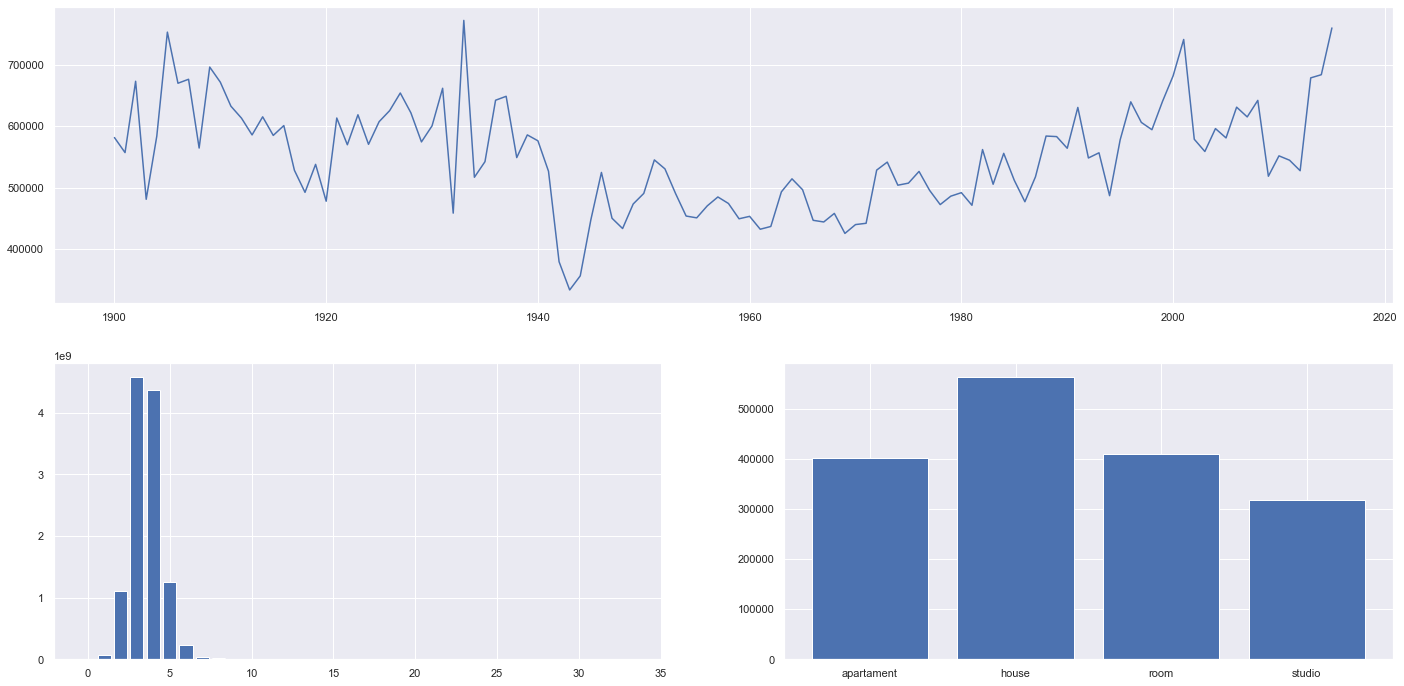

In [27]:
# Objetivo: Criar um dashboard com a respostas das questão 2, 3 e 4.
from matplotlib import gridspec

fig = plt.figure(figsize=(24,12))
specs = gridspec.GridSpec ( ncols = 2, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0, :])
ax2 = fig.add_subplot(specs[1, 0])
ax3 = fig.add_subplot(specs[1, 1])

# Questão02
# Objetivo = Grafico da soma de preços pelo número de quarto
# Eixo X: Número de quartos
# Eixo Y: Preço
# Grafico: BARRAS
df= data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
ax2.bar(df['bedrooms'],df['price'])

# Questão03
# Objetivo: Grafico que mostre a média dos preço por ano de construção
# Eixo X: Ano de construção.
# Eixo Y: Preço
# Grafico: Linhas
price_built = data[['price','yr_built']].groupby('yr_built').mean().reset_index() 
ax1.plot(price_built['yr_built'],price_built['price'])


# Questão04
# Objetivo: Grafico que mostre a média dos preço por dormitório;
# Eixo X: Dormitórios
# Eixo Y: Preço
# Grafico: Barras

price_dorm = data[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
ax3.bar(price_dorm['dormitory_type'],price_dorm['price'])

## 7.8 Crie um Dashboard com os gráficos as perguntas 02,04 ( Dashboard: 2 colunas)

<BarContainer object of 4 artists>

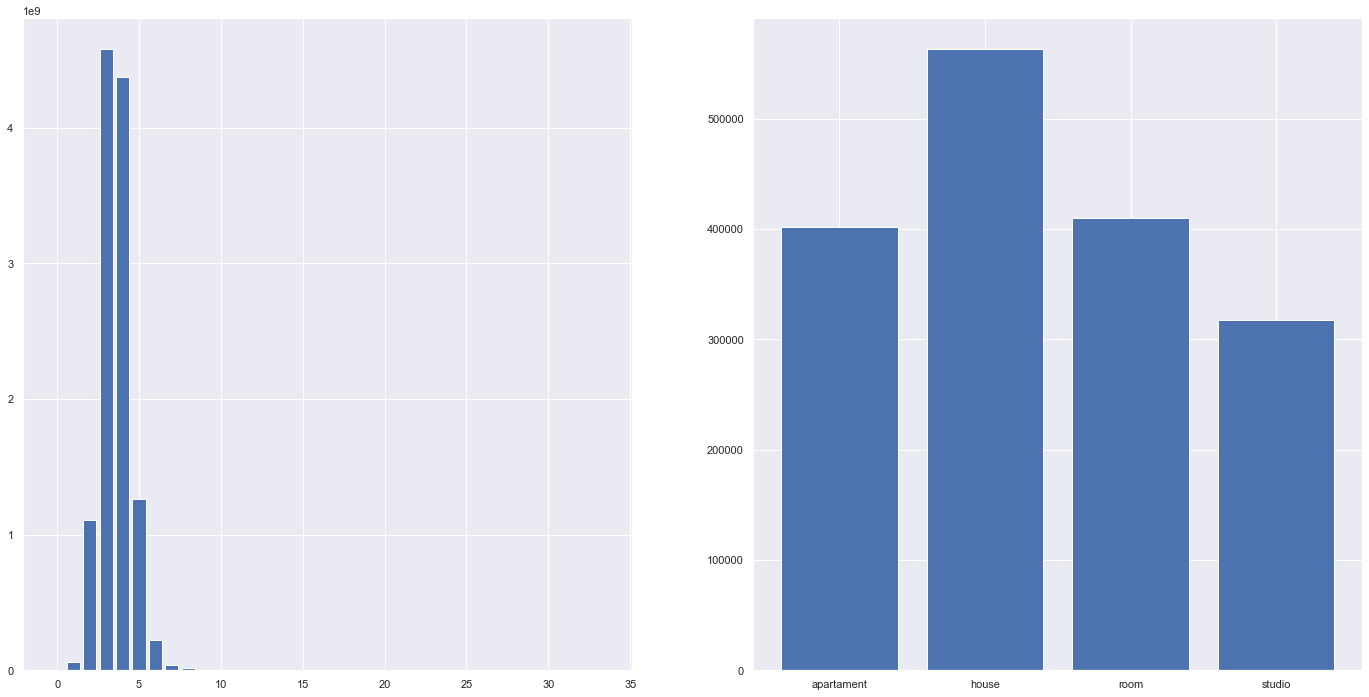

In [28]:
from matplotlib import gridspec

fig = plt.figure(figsize=(24,12))
specs = gridspec.GridSpec( ncols = 2, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])

# Questão02
# Objetivo = Grafico da soma de preços pelo número de quarto
# Eixo X: Número de quartos
# Eixo Y: Preço
# Grafico: BARRAS
df= data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
ax1.bar(df['bedrooms'],df['price'])

# Questão04
# Objetivo: Grafico que mostre a média dos preço por dormitório;
# Eixo X: Dormitórios
# Eixo Y: Preço
# Grafico: Barras

price_dorm = data[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
ax2.bar(price_dorm['dormitory_type'],price_dorm['price'])

##    7.9 Crie um Dashboard com os gráficos das perguntas 03,05 (Dashboard: 2 linhas) 

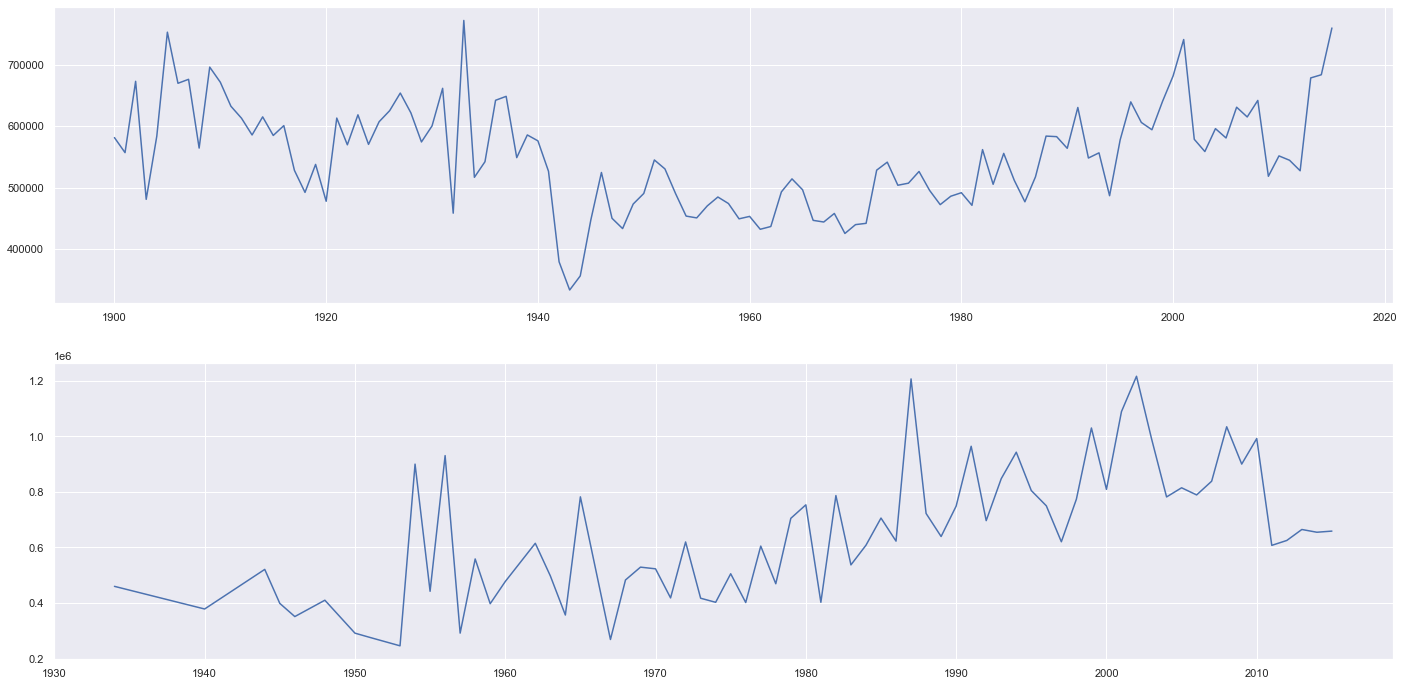

In [29]:
from matplotlib import gridspec

fig =  plt.figure(figsize=(24,12))
specs = gridspec.GridSpec( nrows = 2, ncols = 1, figure=fig) 

ax1 = fig.add_subplot(specs[0, :])
ax2 = fig.add_subplot(specs[1, :])

# Questão 03
price_built = data[['price','yr_built']].groupby('yr_built').mean().reset_index() 
ax1.plot(price_built['yr_built'],price_built['price']);

# Questão 05
price_renovated = data.loc[data['yr_renovated'] >= 1930, ['price','yr_renovated']].groupby('yr_renovated').mean().reset_index()
ax2.plot(price_renovated['yr_renovated'],price_renovated['price']);

## 7.10 Faça um mapa com o tamanho dos pontos sendo igual ao tamanho da sala de estar.

In [31]:
import plotly.express as px

kc_map = data[['id','price','lat','long','sqft_living']]

fig = px.scatter_mapbox(kc_map,
                        lat='lat',
                        lon='long',
                        hover_name='id',
                        hover_data=['price'],
                        size='sqft_living',
                        color_discrete_sequence = ['darkblue'],
                        size_max = 20,
                        zoom = 5)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(height=400, margin={'r':0,'l':0,'t':0,'b':0})
fig.show()